In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/naman/pgads/h1n1_vaccine_prediction.csv')

In [ ]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
data.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [ ]:
data.shape

(26707, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

##### If the percentage of missing values is mpore than 70% than drop the column otherwise include it

In [ ]:
data.isnull().mean()*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [ ]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
# handling with missing values

c = ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine']
for i in c:
     if (data[i].isnull().sum())>0:
        data[i].fillna(data[i].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

## EDA

([<matplotlib.patches.Wedge at 0x19c70c11580>,
 [Text(-0.8639477490730085, 0.680877585819714, 'NO'),
  Text(0.9032181013035995, -0.711826566993338, 'YES')],
 [Text(-0.4712442267670955, 0.37138777408348034, '78.8%'),
  Text(0.5105145789976866, -0.402336755257104, '21.2%')])

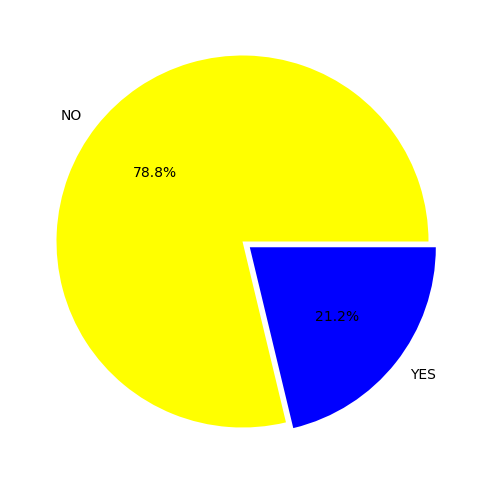

In [ ]:
# pie chart to grahpically represent the class distribution
plt.figure(figsize=(6,8))

labels = ['NO', 'YES']
explode = [.0,0.05]
myColors = ['Yellow', 'Blue']
sizes = data['h1n1_vaccine'].value_counts()

plt.pie(sizes, explode = explode, labels = labels, colors = myColors, autopct='%1.1f%%')

*Based on my hyopthesis these column are not important: wash hand properly, reduced outside home count, avoid face touch, martial status, race, housing status, no.of adults, no. of children *

In [ ]:
# checking for columns haaving string values
data_string = data.select_dtypes(include = np.object_)
data_string

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [ ]:
data_string.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [ ]:
# converting categorical value to numeric by using the LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']

for i in cols:
    data[i] = le.fit_transform(data[i])

In [ ]:
data.head(3)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0


### Checking for hypothesis with Chi-Square test of independence

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
x1 = data.drop('h1n1_vaccine',axis=1)
y1 = data.h1n1_vaccine

In [ ]:
# returns f score and p value
f_score = chi2(x1, y1)

In [ ]:
f_score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 2.01459556e+01,
        1.49313640e+01, 6.77656778e+00, 1.28867110e+01, 3.05614312e+01,
        1.99380265e+01, 2.49155964e+00, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

In [ ]:
p_value = pd.Series(f_score[1], index=x1.columns)

In [ ]:
irr_cols = []
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,':- Reject Null Hypothesis')
    else:
        print(x, ':- Accept Null Hypothesis')
        irr_cols.append(x)

unique_id :- Reject Null Hypothesis
h1n1_worry :- Reject Null Hypothesis
h1n1_awareness :- Reject Null Hypothesis
antiviral_medication :- Reject Null Hypothesis
contact_avoidance :- Reject Null Hypothesis
bought_face_mask :- Reject Null Hypothesis
wash_hands_frequently :- Reject Null Hypothesis
avoid_large_gatherings :- Reject Null Hypothesis
reduced_outside_home_cont :- Reject Null Hypothesis
avoid_touch_face :- Reject Null Hypothesis
dr_recc_h1n1_vacc :- Reject Null Hypothesis
dr_recc_seasonal_vacc :- Reject Null Hypothesis
chronic_medic_condition :- Reject Null Hypothesis
cont_child_undr_6_mnths :- Reject Null Hypothesis
is_health_worker :- Reject Null Hypothesis
has_health_insur :- Accept Null Hypothesis
is_h1n1_vacc_effective :- Reject Null Hypothesis
is_h1n1_risky :- Reject Null Hypothesis
sick_from_h1n1_vacc :- Reject Null Hypothesis
is_seas_vacc_effective :- Reject Null Hypothesis
is_seas_risky :- Reject Null Hypothesis
sick_from_seas_vacc :- Accept Null Hypothesis
age_bracket 

In [ ]:
# drop the columns
data.drop(irr_cols, axis=1, inplace=True)

In [ ]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,3,1,3,0,2,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,2.0,1,0,3,1,2,1,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0,2,3,1,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5.0,4.0,4,0,3,0,2,1,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,1.0,2,3,3,0,0,0,0,0


## Analyzing the data

#### Bi-Varirate Analysis
using this because all the columns are catgeorical values

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

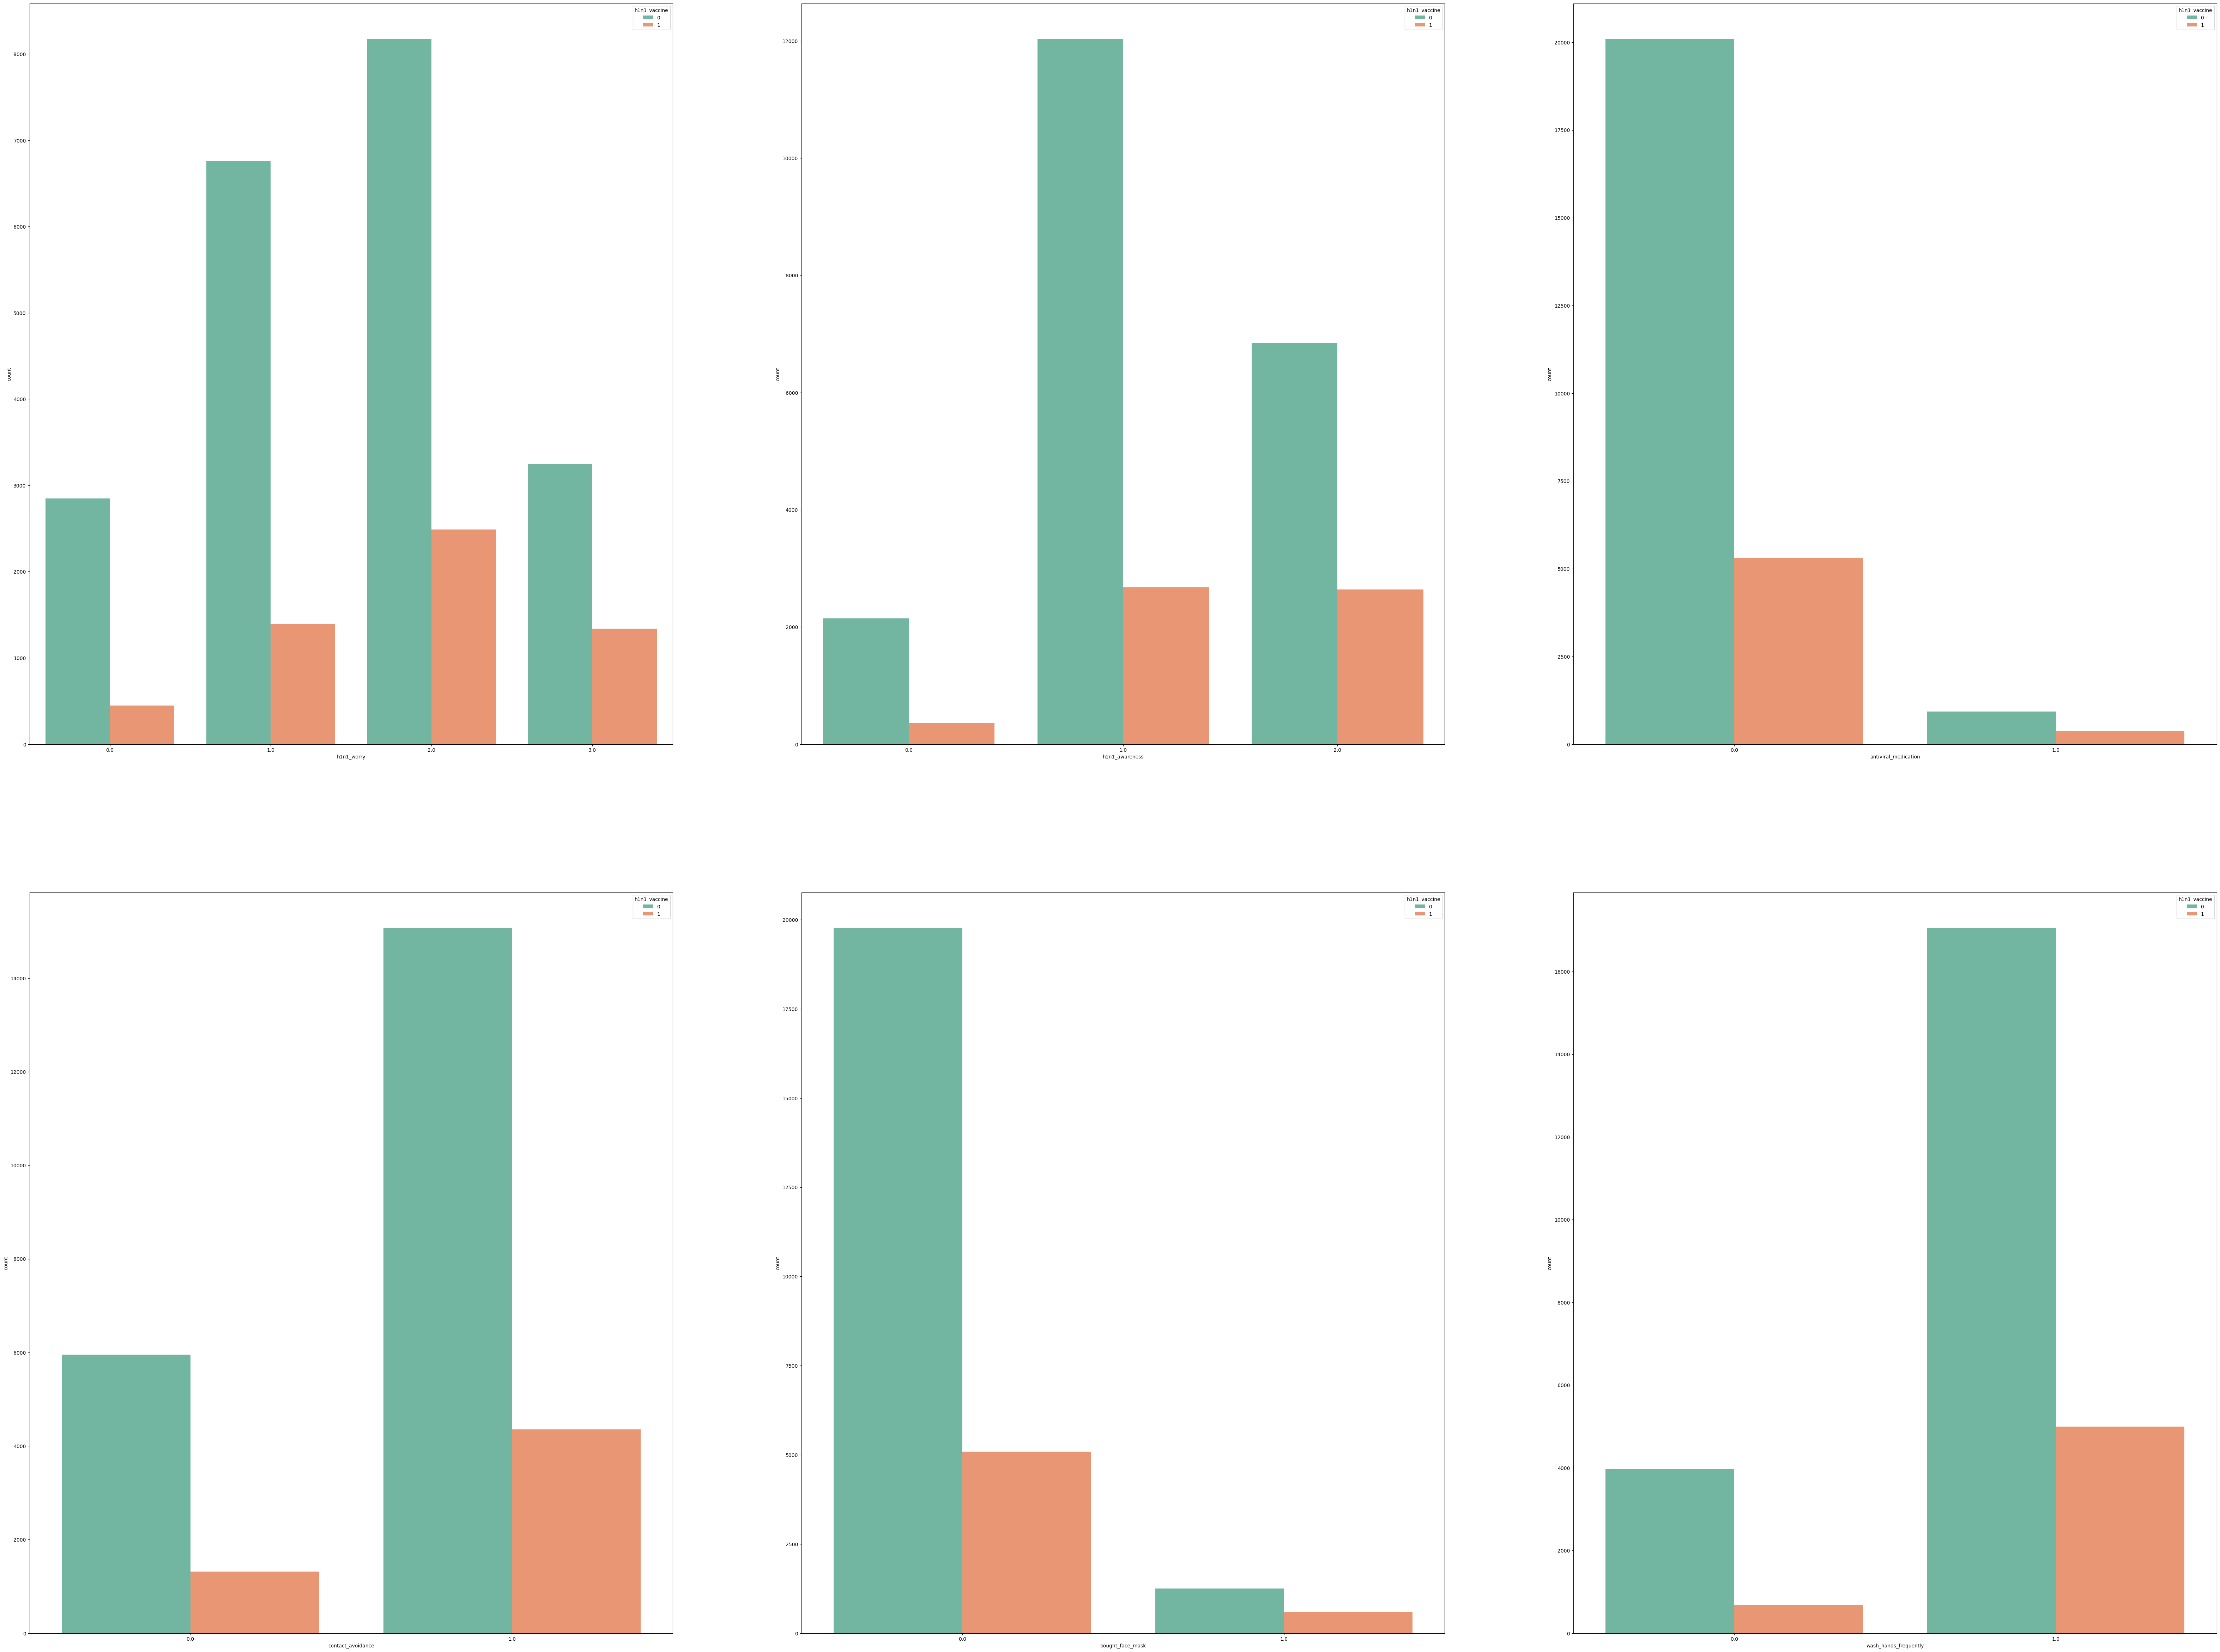

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(80,60))

sns.countplot(x='h1n1_worry', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][0])
sns.countplot(x='h1n1_awareness', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][1])
sns.countplot(x='antiviral_medication', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][2])
sns.countplot(x='contact_avoidance', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][0])
sns.countplot(x='bought_face_mask', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][1])
sns.countplot(x='wash_hands_frequently', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][2])

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

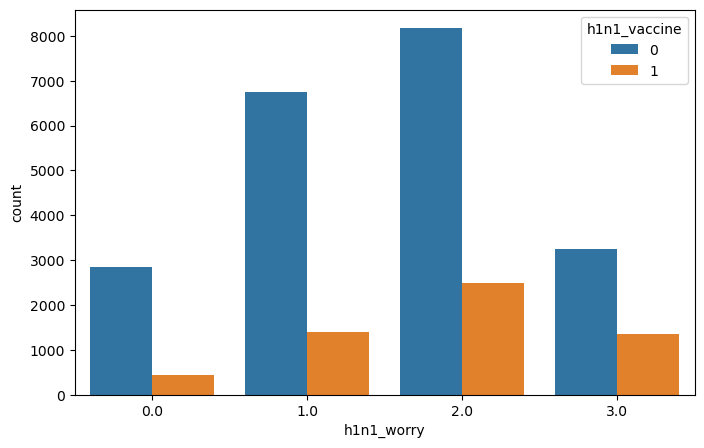

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='h1n1_worry', hue='h1n1_vaccine', data=data)

##### Insights:
- Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
1. People who are Not Worried (vaccined : ~2800, not vaccined: ~400-500)
2. People whoe are Not very worried (vaccined : ~6800, not vaccined: ~1500)
3. People whoe are Sometimes worried (vaccined : ~7900, not vaccined: ~2600)
4. People whoe are Very worried (vaccined : ~3100, not vaccined: ~1500)

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

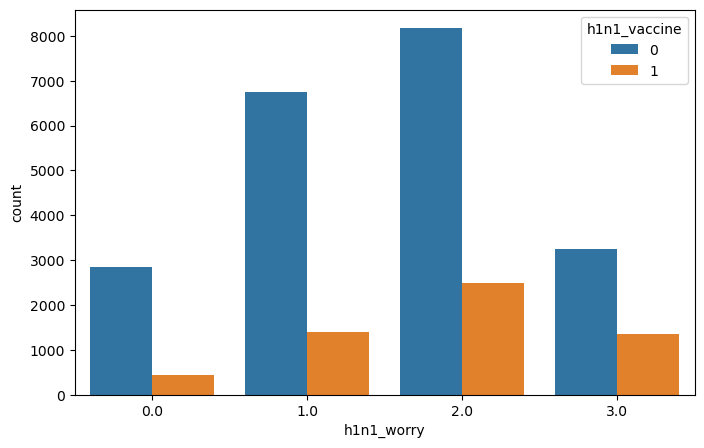

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='h1n1_worry', hue='h1n1_vaccine', data=data)

## Model Building and Evaluation

In [ ]:
x = data.drop(columns = ['h1n1_vaccine'])
y = data.h1n1_vaccine

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21365, 27), (5342, 27), (21365,), (5342,))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Making a Prediction
y_pred = log_reg.predict(x_test)

In [ ]:
y_test

15772    0
9407     0
16515    0
23353    0
10008    0
        ..
25132    1
20086    0
5045     1
6340     0
12943    0
Name: h1n1_vaccine, Length: 5342, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8137401722201423

In [ ]:
# Area Under Curve (ROC)
auc = roc_auc_score(y_test, y_pred)
auc

0.632258864264764

In [ ]:
from sklearn.metrics import recall_score
precision_score = precision_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test,y_pred)

In [ ]:
print('Auc Score:', auc)
print('F1 Score:', f1_score)
print('Accuracy Score:',accuracy)

Auc Score: 0.632258864264764
F1 Score: 0.4191476941039113
Accuracy Score: 0.8137401722201423


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3988,  224],
       [ 771,  359]], dtype=int64)

<AxesSubplot:>

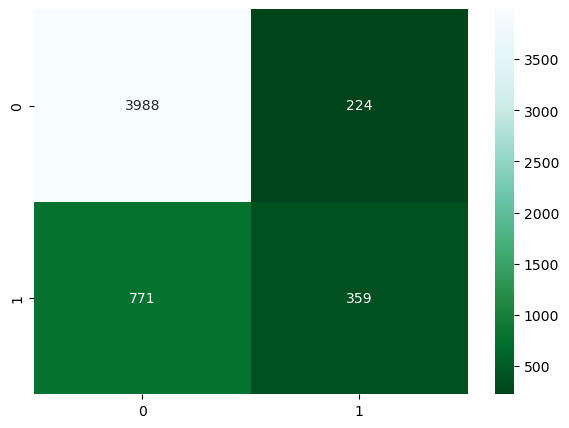

In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot = True, cmap = 'BuGn_r', fmt='d')

In [ ]:
# dropping -ve weights

In [ ]:
coff = log_reg.coef_
coff

array([[-2.44813405e-05, -1.72430258e-01,  4.60588773e-02,
        -1.67171121e-03, -1.75321950e-01,  7.51749094e-02,
        -2.39341819e-01, -1.78997490e-01, -1.68579501e-01,
        -9.50020376e-02,  1.20275185e+00,  5.31052305e-01,
         1.24327716e-01,  6.46279576e-02,  4.02549467e-01,
         3.32986066e-01,  4.77742389e-01, -1.85702473e-01,
        -2.35902852e-01,  3.72468360e-02, -3.39275078e-02,
        -6.10236821e-02, -3.18615149e-01, -2.16745054e-01,
        -2.01811435e-01, -4.50329883e-01, -3.49505789e-01]])

In [ ]:
# # new_cols = []
# # for i in range(0,26):
# #     if coff[0][i] < 0:
#         new_cols.append(x.columns[i])

In [ ]:
# new_cols

In [ ]:
# X = x.drop(columns = new_cols)
# Y = data.h1n1_vaccine

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35, random_state=60)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()

# log_reg.fit(X_train, Y_train)

In [ ]:
# Y_pred = log_reg.predict(X_test)

In [ ]:
# Y_test

In [ ]:
# from sklearn.metrics import f1_score
# f1_score = f1_score(Y_test,Y_pred)
# f1_score

In [ ]:
# accuracy = accuracy_score(y_test,y_pred)
# accuracy

In [ ]:
# from sklearn.metrics import precision_score
# precision_score1 = precision_score(y_test, y_pred)
# precision_score1

In [ ]:
# # ROC
# auc1 = roc_auc_score(y_test, y_pred)
# auc1

## Balancing the data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=23)
X_sm,Y_sm = sm.fit_resample(x,y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm,Y_sm, test_size=0.35, random_state=60)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score

accuracy = accuracy_score(Y_test, Y_pred)*100
roc_auc_score = roc_auc_score(Y_test, Y_pred)*100
precision_score = precision_score(Y_test, Y_pred)*100
f1score = f1_score(Y_test, Y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"precision_score = {precision_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 78.4094
roc_auc_score = 78.4115
precision_score = 79.034
F1 Score = 78.6573


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

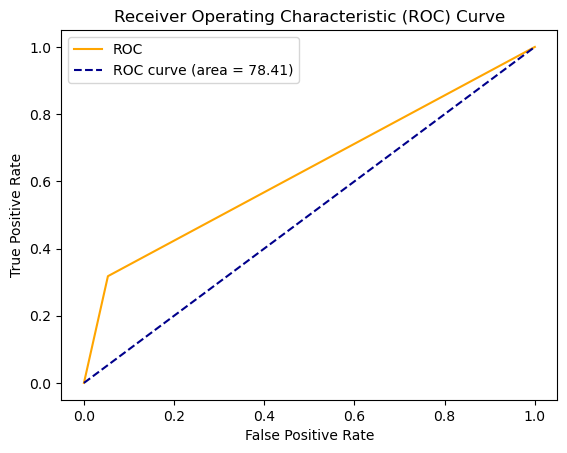

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\COSMOS\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    aiobotocore-2.5.0          |   py39haa95532_0         116 KB
    aiofiles-22.1.0            |   py39haa95532_0          25 KB
    aiohttp-3.8.3              |   py39h2bbff1b_0         415 KB
    aioitertools-0.7.1         |     pyhd3eb1b0_0          20 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    aiosqlite-0.18.0           |   py39haa95532_0          34 KB
    anaconda-2023.07           |           py39_1          76 KB
    anaconda-anon-usage-0.4.0  |   py39h8ddfbff_0          26 KB
    anaconda-client-1.12.0     |   py39haa95532_0         166 KB
    anaconda-navigator-2.4.3   |   py39haa95532_0         5.5 MB
    arrow-1.2.3             



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\COSMOS\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)
